# Proyecto Integrador - Python Avanzado
## Customer Personality Analysis

Dataset for this project can be found in the following link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

### Context
#### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

##### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Target
Need to perform clustering to summarize customer segments.

### Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

# Importing Required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 999)

# Defining functions

In [2]:
def generate_histograms(variable, title, rotate_x_axis=False, discrete=False):
    # Ajustes de la figura de Matplotlib
    if variable.dtype in ['float', 'float64', 'int', 'int64']:
        fig, ((ax_box, ax_dummy), (ax_hist, ax_des)) = plt.subplots(
            nrows=2, ncols=2, figsize=(14, 4), sharex=True,
            gridspec_kw={"height_ratios": (.15, .85)},
            constrained_layout=True)
        fig.set_constrained_layout_pads(
            hspace=0.0, h_pad=0.0,
            wspace=0.0, w_pad=0.2,)
    elif variable.dtype != 'O':
        fig, (ax_hist, ax_des) = plt.subplots(
            nrows=1, ncols=2, figsize=(14, 4), sharex=True,
            constrained_layout=True)
        fig.set_constrained_layout_pads(
            wspace=0.0, w_pad=0.2,)
    else:
        fig, ax_hist = plt.subplots(
            nrows=1, ncols=1, figsize=(14, 4), sharex=True)

    # Plotea el histograma
    hist = sns.histplot(data=variable, ax=ax_hist, kde=False, discrete=discrete)
    ax_hist.set_xlabel(title)
    ax_hist.set_ylabel('Frecuency')
    
    # Plotea la curva de densidad
    if variable.dtype != 'O':
        des = sns.kdeplot(data=variable, ax=ax_des, fill=True)
        ax_des.set_xlabel(title)
        ax_des.set_ylabel('Density')
        # Plot the BoxPlot
        if variable.dtype in ['float', 'float64', 'int', 'int64']:
            sns.boxplot(x=variable, ax=ax_box)
            ax_box.set(xlabel='')
            ax_box.get_yaxis().set_ticks([])
            ax_box.tick_params(axis='x', which='both', bottom=False)
            ax_box.spines['bottom'].set_visible(False)
            ax_hist.spines['top'].set_visible(False)

    plt.draw()
    if rotate_x_axis:
        # set_xticks is to avoid 'UserWarning: FixedFormatter'
        ax_hist.set_xticks(ax_hist.get_xticks())
        labels = [x.get_text() for x in ax_hist.get_xticklabels()]
        ax_hist.set_xticklabels(labels, rotation=45)
        
        if variable.dtype != 'O':
            ax_des.set_xticks(ax_des.get_xticks())
            labels = [x.get_text() for x in ax_des.get_xticklabels()]
            ax_des.set_xticklabels(labels, rotation=45)

    if variable.dtype in ['float', 'float64', 'int', 'int64']:
        ax_dummy.spines['top'].set_visible(False)
        ax_dummy.spines['right'].set_visible(False)
        ax_dummy.spines['bottom'].set_visible(False)
        ax_dummy.spines['left'].set_visible(False)
        # ax_dummy.get_xaxis().set_ticks([])
        ax_dummy.tick_params(axis='x', which='both', bottom=False)
        ax_dummy.get_yaxis().set_ticks([])
        
    fig.suptitle(f'Univariate Analysis: {title}')

In [3]:
def x_range(x):
    x_range = x.max() - x.min()
    return x_range

# Loading Dataset

In [4]:
path_to_dataset = r"C:\Projects\avst\advanced_python\proyecto_integrador\marketing_campaign.csv"
df = pd.read_csv(path_to_dataset, sep='\t')
df['Age'] = 2023 - df['Year_Birth']
display(df.shape)
df.head()

(2240, 30)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Age  
0              3         11         1   66  
1              3         11         0   69  
2              3         11         0   58  
3              3         11         0   39  
4              3         11         0   42

# Defining some list of columns based on the type of columns

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

In [6]:
list_people_cols = [
    'ID', 'Age', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
    'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Complain']
list_products_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds']
list_promotion_cols = [
    'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Response']
list_place_cols = [
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth']

# Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response          Age  
count  2240.000000  2240.000000  
mean      0.149107    54.194196  
std       0.356274    11.98406

In [9]:
df['Marital_Status'].drop_duplicates()

0         Single
2       Together
4        Married
6       Divorced
38         Widow
131        Alone
2093      Absurd
2177        YOLO
Name: Marital_Status, dtype: object

In [10]:
df[df['Marital_Status']=='YOLO']

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2177    492        1973       PhD           YOLO  48432.0        0         1   
2202  11133        1973       PhD           YOLO  48432.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2177  18-10-2012        3       322          3               50   
2202  18-10-2012        3       322          3               50   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2177                4                 3            42                  5   
2202                4                 3            42                  5   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2177                7                    1                  6   
2202                7                    1                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2177                  8             0             0             0   
2202                  8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
2177             0             0         0              3         11   
2202             0             0         0              3         11   

      Response  Age  
2177         0   50  
2202         1   50

Looks like that are records duplicated but with different ID

In [11]:
clean_cols = list(set(df.columns) - {'ID', 'Response'})
df_clean = df[clean_cols].drop_duplicates()
display(df.shape)
display(df_clean.shape)

(2240, 30)

(2039, 28)

Removing ID and Response reduce the dataset from 2240 rows to 2039

In [12]:
clean_cols = list(set(df.columns) - {'ID'})
df_clean = df[clean_cols].drop_duplicates()
display(df.shape)
display(df_clean.shape)

(2240, 30)

(2058, 29)

Looks like that there are ~200 duplicated records

# Univariate Analysis
## Age

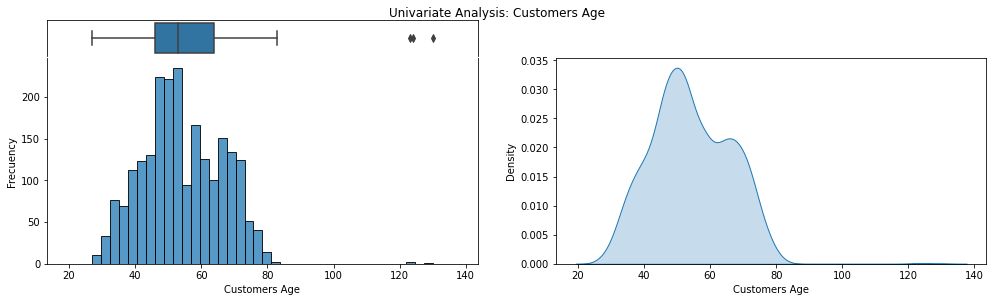

In [13]:
generate_histograms(df['Age'], "Customers Age")

In [14]:
df[['Age']].agg(["min", "mean", "median", "max", x_range]).round().T

min  mean  median    max  x_range
Age  27.0  54.0    53.0  130.0    103.0

In [15]:
df_age_outliers = df[df['Age'] > 90]
display(len(df_age_outliers))
df_age_outliers

3

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
192             0             0         1              3         11         0   
239             0             0         0              3         11         0   
339             0             0         0              3         11         0   

     Age  
192  123  
239  130  
339  124

### Removing outliers

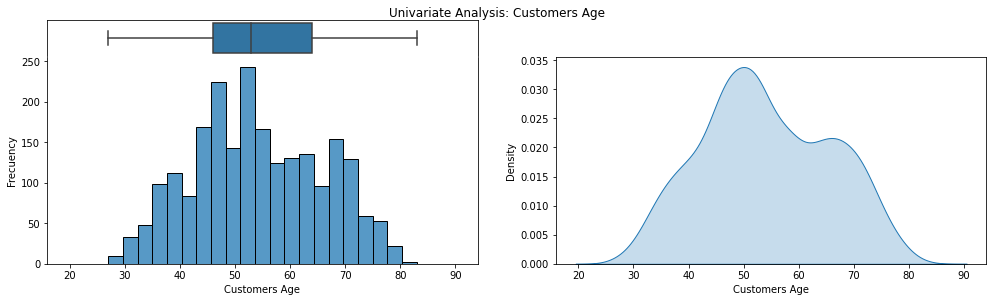

In [16]:
df_age_clean = df[df['Age'] < 100]
generate_histograms(df_age_clean['Age'], "Customers Age")

In [17]:
df_age_clean[['Age']].agg(["min", "mean", "median", "max", x_range]).round().T

min  mean  median   max  x_range
Age  27.0  54.0    53.0  83.0     56.0

## Income

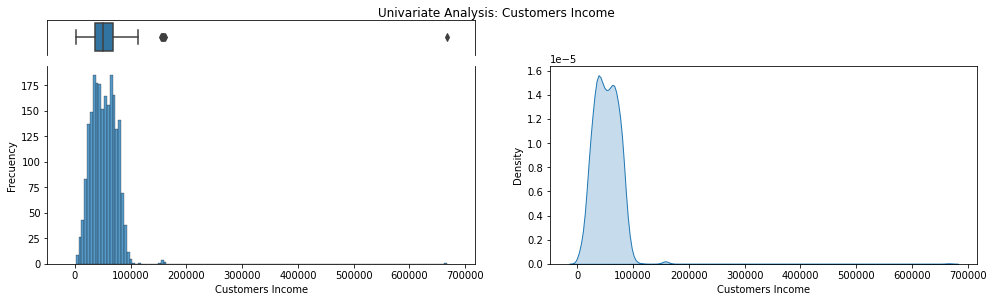

In [18]:
generate_histograms(df['Income'], "Customers Income")

In [19]:
df[['Income']].agg(["min", "mean", "median", "max", x_range]).round(2).T

min      mean   median       max   x_range
Income  1730.0  52247.25  51381.5  666666.0  664936.0

### Removing Outliers

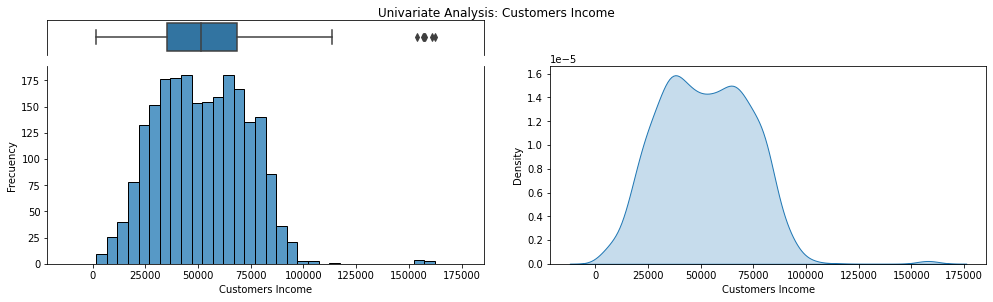

In [20]:
df_income = df[df['Income'] < 200000]
generate_histograms(df_income['Income'], "Customers Income")

In [21]:
df_income[['Income']].agg(["min", "mean", "median", "max", x_range]).round(2).T

min      mean   median       max   x_range
Income  1730.0  51969.86  51373.0  162397.0  160667.0

## Recency
Number of days since customer's last purchase

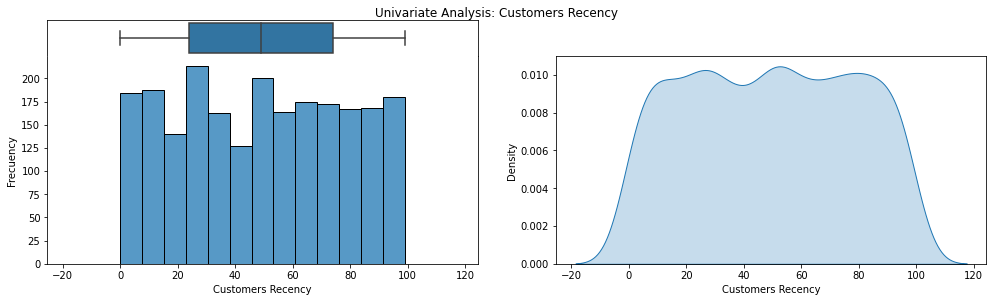

In [22]:
generate_histograms(df['Recency'], "Customers Recency")

## Date Customer's enrollment
Date of customer's enrollment with the company

In [23]:
df['Dt_Customer'].drop_duplicates().head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

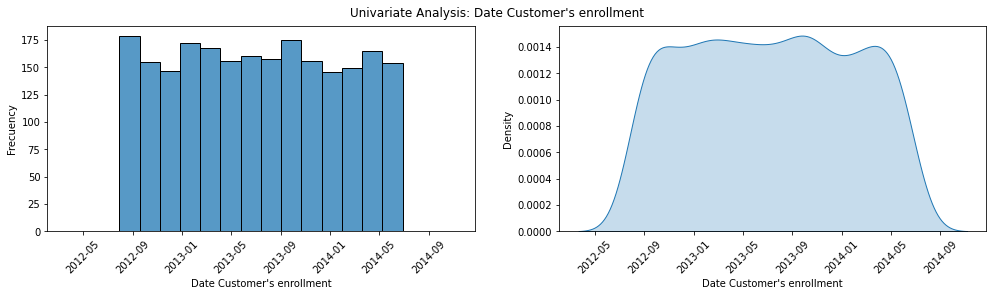

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
generate_histograms(df['Dt_Customer'], "Date Customer's enrollment", rotate_x_axis=True)

## Marital Status

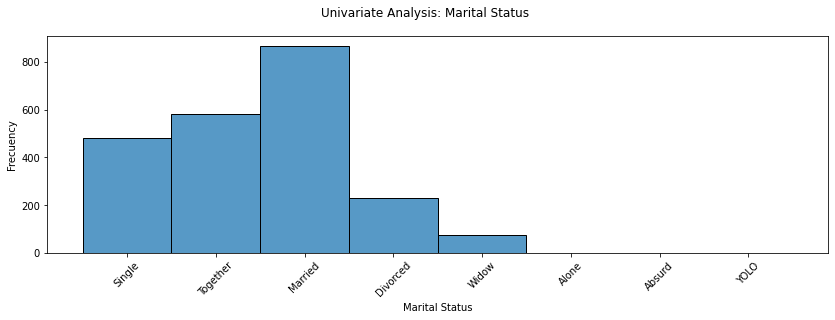

In [25]:
generate_histograms(df['Marital_Status'], "Marital Status", rotate_x_axis=True, discrete=True)

### Removing the Marital Status that doesnt make sense

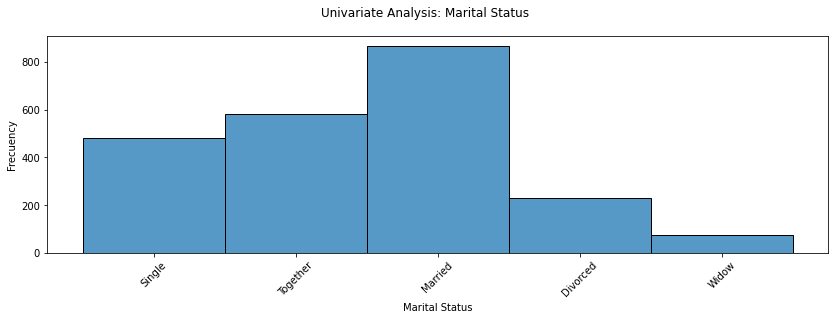

In [26]:
vals_to_remove = ['Alone', 'Absurd', 'YOLO']
df_ma_status = df[~df['Marital_Status'].isin(vals_to_remove)]
generate_histograms(df_ma_status['Marital_Status'], "Marital Status", rotate_x_axis=True, discrete=True)

### Education

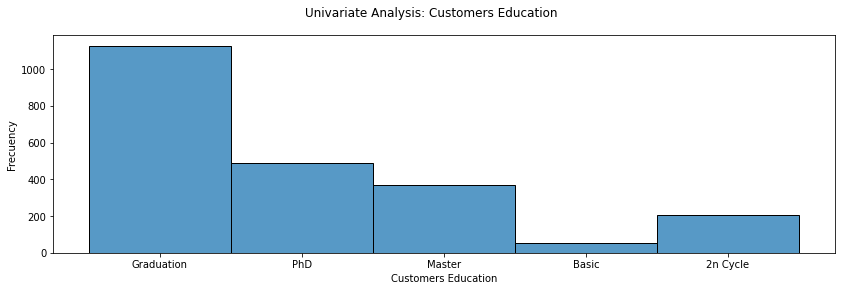

In [27]:
generate_histograms(df['Education'], "Customers Education", discrete=True)

## Products

In [28]:
df_products = df[list_products_cols].agg(["max", "mean", "sum"]).T
df_products.reset_index(inplace=True)
df_products.rename({"index": "Products"}, axis=1, inplace=True)
df_products = df_products.sort_values(by=['sum'], ascending=False)
df_products

Products     max        mean       sum
0          MntWines  1493.0  303.935714  680816.0
2   MntMeatProducts  1725.0  166.950000  373968.0
5      MntGoldProds   362.0   44.021875   98609.0
3   MntFishProducts   259.0   37.525446   84057.0
4  MntSweetProducts   263.0   27.062946   60621.0
1         MntFruits   199.0   26.302232   58917.0

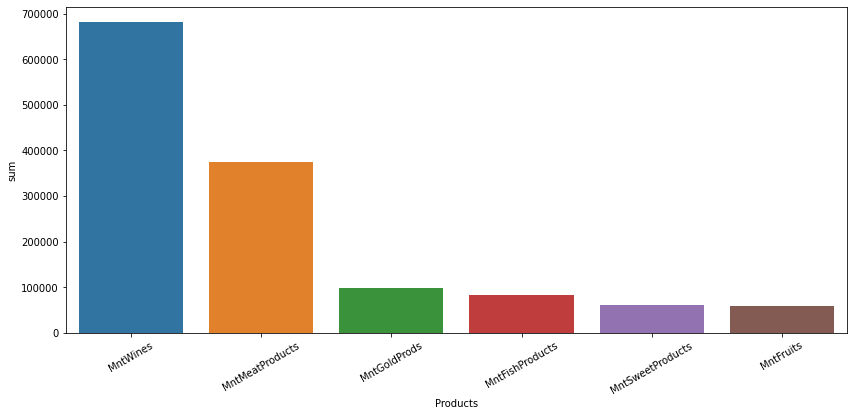

In [29]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=df_products, x="Products", y="sum", ax=ax)
_ = plt.xticks(rotation=30)

## Promotions

In [30]:
df_promotions = df[list_promotion_cols]
df_promotions.head()

NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0                  3             0             0             0             0   
1                  2             0             0             0             0   
2                  1             0             0             0             0   
3                  2             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp5  Response  
0             0         1  
1             0         0  
2             0         0  
3             0         0  
4             0         0

In [31]:
df_promotions.columns

Index(['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
      dtype='object')

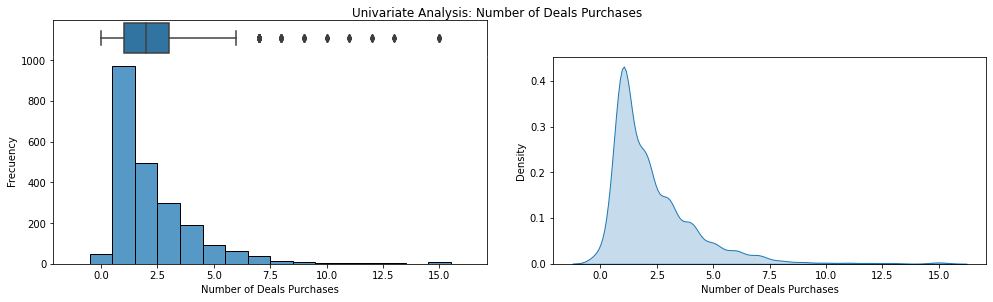

In [32]:
generate_histograms(df['NumDealsPurchases'], "Number of Deals Purchases", discrete=True)

## Counting the frequency when the customers take the Deal

In [33]:
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response']].value_counts().reset_index().rename({0: "Count"}, axis=1)

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0              0             0             0             0             0   
1              0             0             0             0             0   
2              0             0             1             0             0   
3              0             0             0             1             0   
4              0             0             1             0             0   
5              1             0             0             0             0   
6              0             0             0             0             1   
7              0             0             0             0             1   
8              1             0             0             1             1   
9              1             0             0             0             1   
10             1             0             0             0             0   
11             0             0             0             1             1   
12             0             0             0             1             1   
13             0             0             0             1             0   
14             1             0             1             0             1   
15             1             0             0             1             0   
16             1             1             0             1             1   
17             1             0             0             0             1   
18             1             0             0             1             0   
19             1             0             1             0             0   
20             0             1             0             1             0   
21             1             0             0             1             1   
22             0             0             1             0             1   
23             1             0             1             0             0   
24             1             0             1             0             1   
25             1             1             1             0             1   
26             0             1             0             1             0   
27             0             1             1             0             1   
28             0             1             0             1             1   
29             0             1             0             1             1   
30             1             1             0             1             0   
31             0             0             1             0             1   
32             0             1             1             0             0   
33             0             1             0             0             0   
34             1             1             0             1             1   

    Response  Count  
0          0   1631  
1          1    146  
2          0     74  
3          0     73  
4          1     55  
5          0     39  
6          0     38  
7          1     21  
8          1     19  
9          1     14  
10         1     13  
11         0     12  
12         1     12  
13         1     11  
14         1     10  
15         0      8  
16         1      7  
17         0      7  
18         1      6  
19         1      5  
20         0      5  
21         0      4  
22         0      4  
23         0      3  
24         0      3  
25         1      3  
26         1      3  
27         1      2  
28         1      2  
29         0      2  
30         1      2  
31         1      2  
32         0      2  
33         1      1  
34         0      1

# Checking correlation People vs Type of Products

## Cleaning dataset
For this, one test will be using just the 'people cols' and the 'product cols' removing where they bought and if they take advantage of the promotions

In [34]:
df_clean = df[df['Income'] < 100000]
df_clean = df_clean[df_clean['Age'] < 90]
df_clean = df_clean[df_clean['MntMeatProducts'] < 1250]
print("Before cleaning: ")
display(df.shape)
print("After cleaning: ")
df_clean.shape

Before cleaning: 


(2240, 30)

After cleaning: 


(2199, 30)

## Calculating Correlation

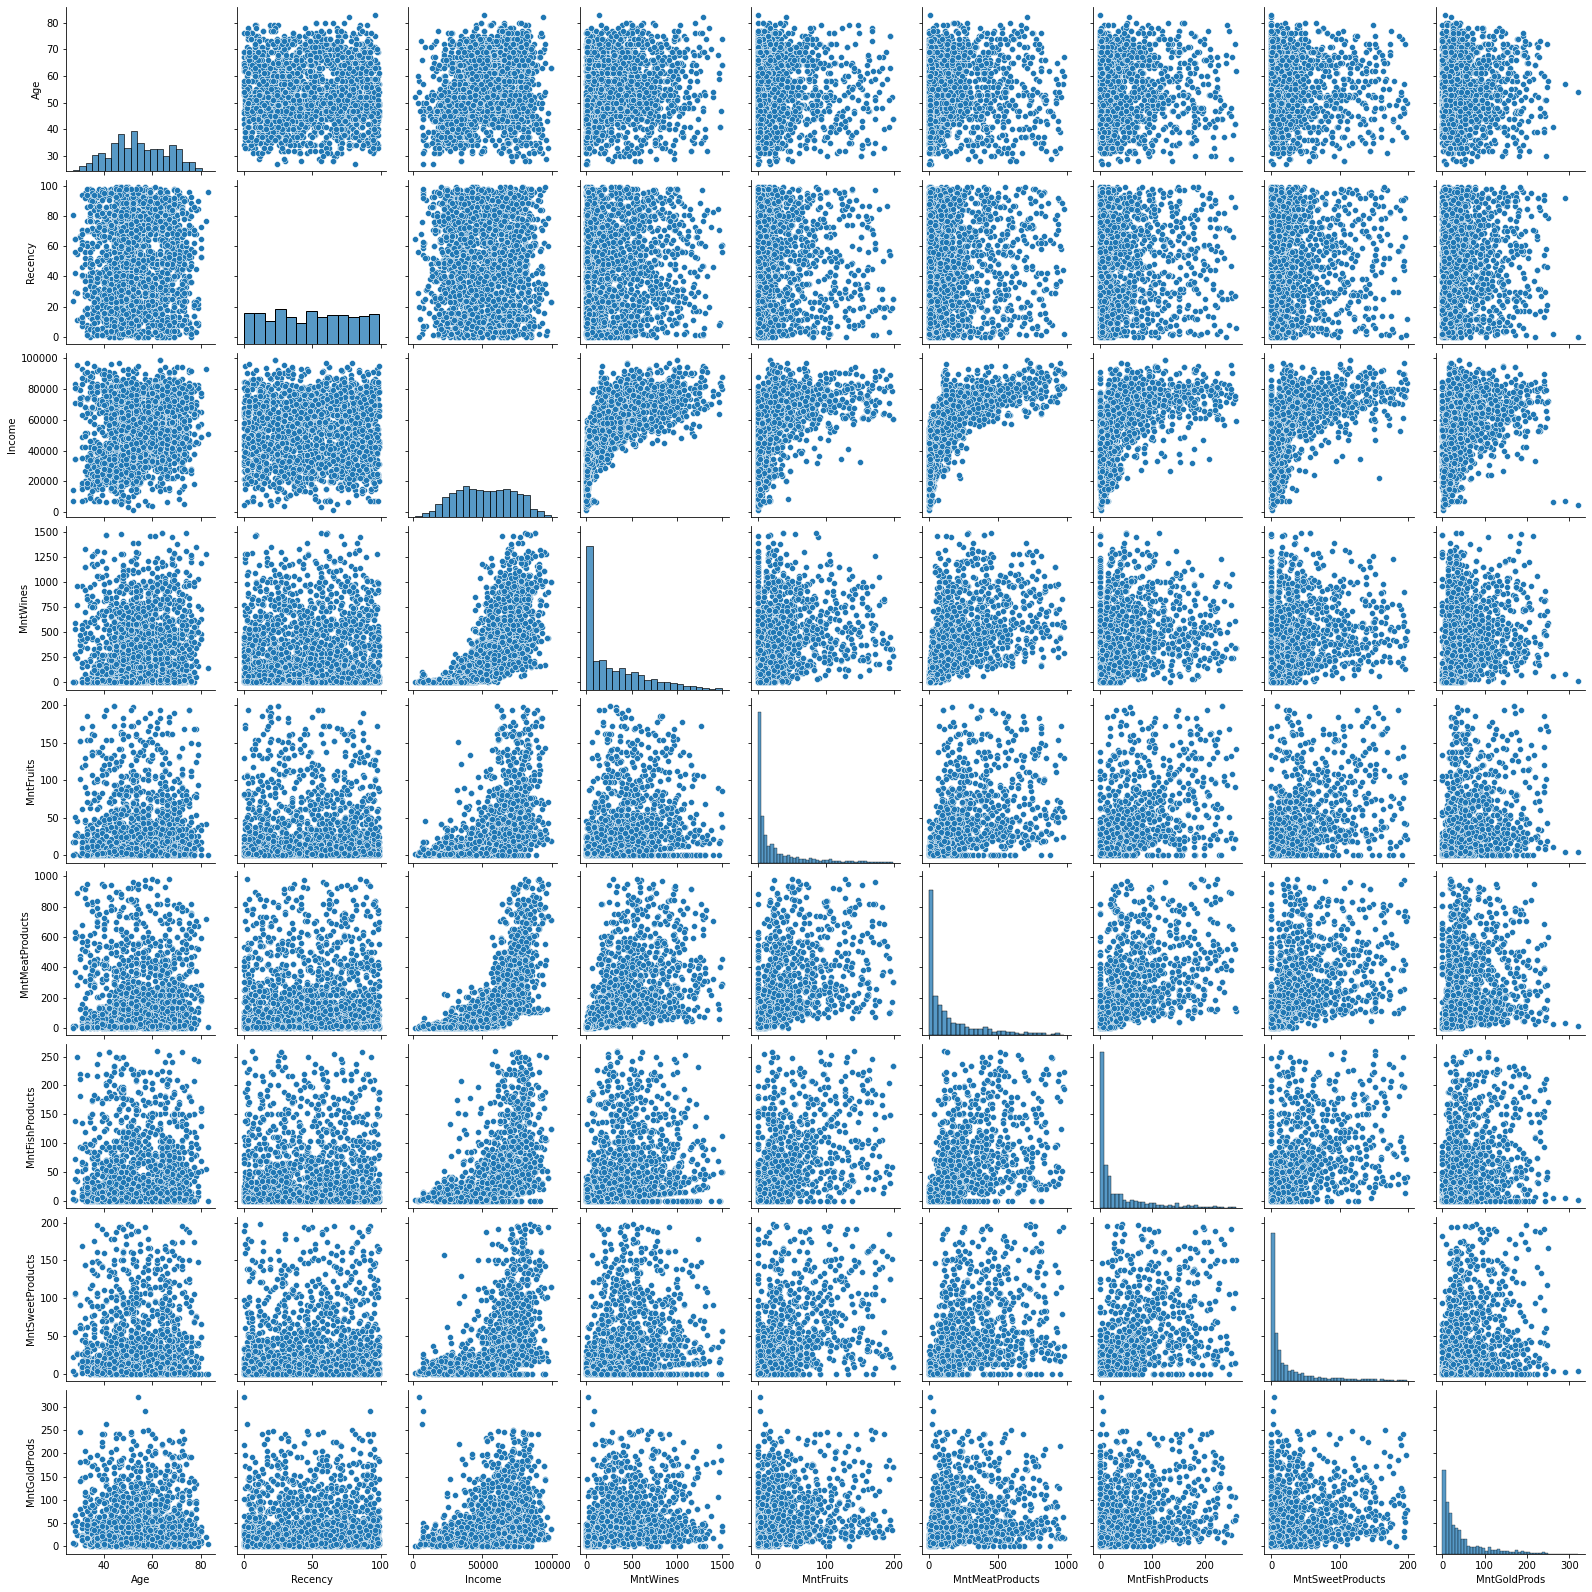

In [35]:
cols_to_use = list(set(list_people_cols) - {'ID', 'Year_Birth', 'Complain', 'Kidhome', 'Teenhome', 'Dt_Customer'})
cols_to_use += list_products_cols
df_peo_pro = df_clean[cols_to_use]
sns.pairplot(df_peo_pro, diag_kind="hist")

In [36]:
df_correlation = df_peo_pro.corr()
df_correlation

C:\Users\mibolano\AppData\Local\Temp/ipykernel_24868/150718109.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_peo_pro.corr()


Age   Recency    Income  MntWines  MntFruits  \
Age               1.000000  0.015568  0.213870  0.166638   0.014371   
Recency           0.015568  1.000000  0.009720  0.015515  -0.002485   
Income            0.213870  0.009720  1.000000  0.734021   0.537851   
MntWines          0.166638  0.015515  0.734021  1.000000   0.384310   
MntFruits         0.014371 -0.002485  0.537851  0.384310   1.000000   
MntMeatProducts   0.045710  0.027760  0.725902  0.605197   0.579068   
MntFishProducts   0.041767  0.001137  0.553894  0.393852   0.591802   
MntSweetProducts  0.018238  0.031294  0.550538  0.394844   0.578826   
MntGoldProds      0.062026  0.019343  0.414612  0.388115   0.387842   

                  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Age                      0.045710         0.041767          0.018238   
Recency                  0.027760         0.001137          0.031294   
Income                   0.725902         0.553894          0.550538   
MntWines                 0.605197         0.393852          0.394844   
MntFruits                0.579068         0.591802          0.578826   
MntMeatProducts          1.000000         0.606972          0.573541   
MntFishProducts          0.606972         1.000000          0.593164   
MntSweetProducts         0.573541         0.593164          1.000000   
MntGoldProds             0.384103         0.423556          0.359534   

                  MntGoldProds  
Age                   0.062026  
Recency               0.019343  
Income                0.414612  
MntWines              0.388115  
MntFruits             0.387842  
MntMeatProducts       0.384103  
MntFishProducts       0.423556  
MntSweetProducts      0.359534  
MntGoldProds          1.000000

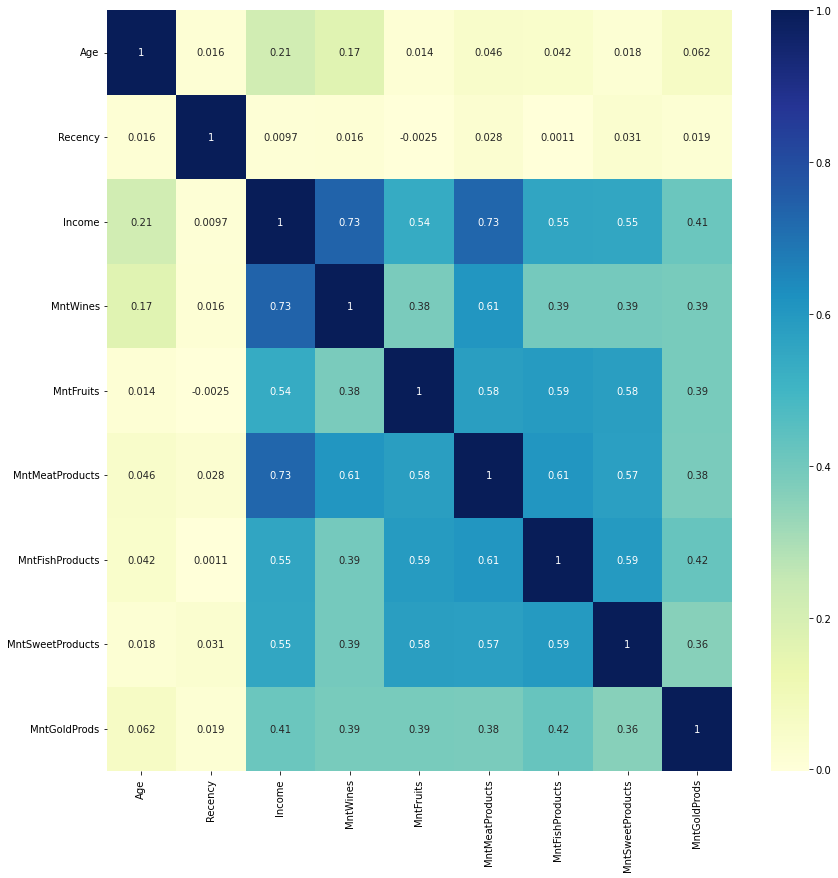

In [37]:
fig = plt.figure(figsize = (14, 14))
sns.heatmap(df_correlation, cmap='YlGnBu', annot=True);

From this, what we can "conclude" is that the 'Income' is the parameter that affect more the customers. Bigger income means bigger purchases.

Also, we can see that the Recency doesnt affect at all.

Age correlate a little bit with the income and the amount of wine that the customer consume.

# Checking correlation People vs Deals

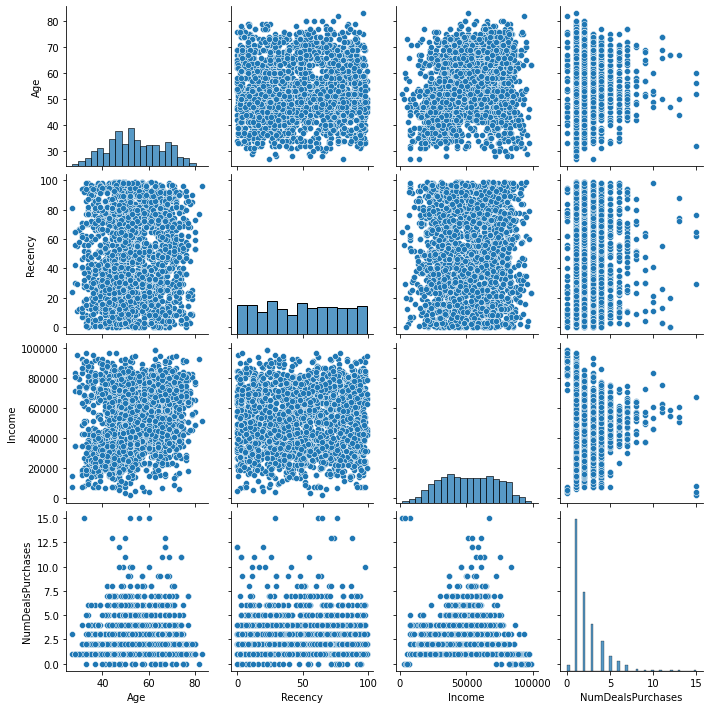

In [38]:
cols_to_use = list(set(list_people_cols) - {'ID', 'Year_Birth', 'Complain', 'Kidhome', 'Teenhome', 'Dt_Customer'})
cols_to_use += ['NumDealsPurchases']
df_peo_prom = df_clean[cols_to_use]
sns.pairplot(df_peo_prom, diag_kind="hist")

C:\Users\mibolano\AppData\Local\Temp/ipykernel_24868/1452928966.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_peo_prom.corr()


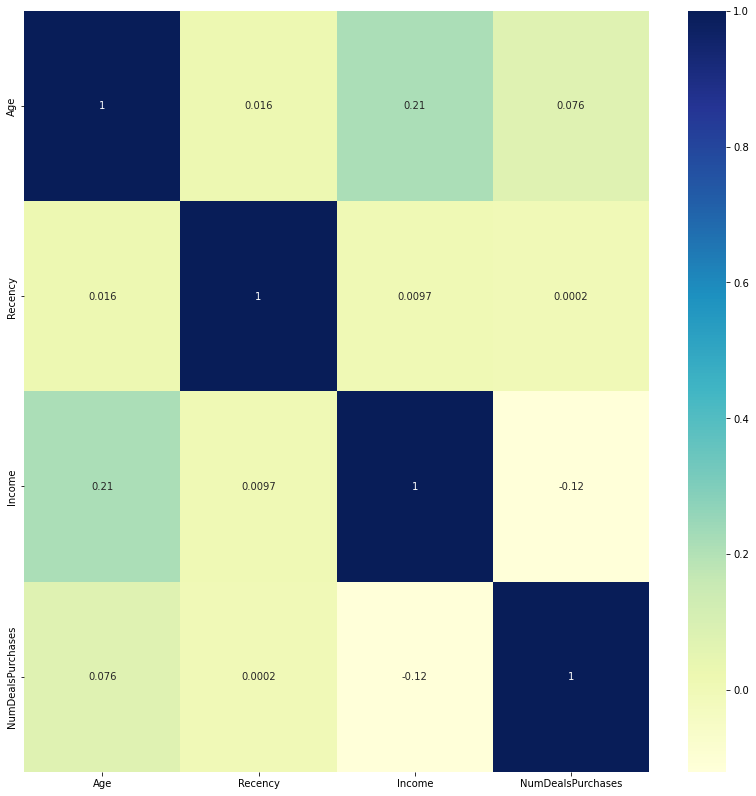

In [39]:
df_correlation = df_peo_prom.corr()
fig = plt.figure(figsize = (14, 14))
sns.heatmap(df_correlation, cmap='YlGnBu', annot=True);

# Checking correlation People vs Places of Purchase

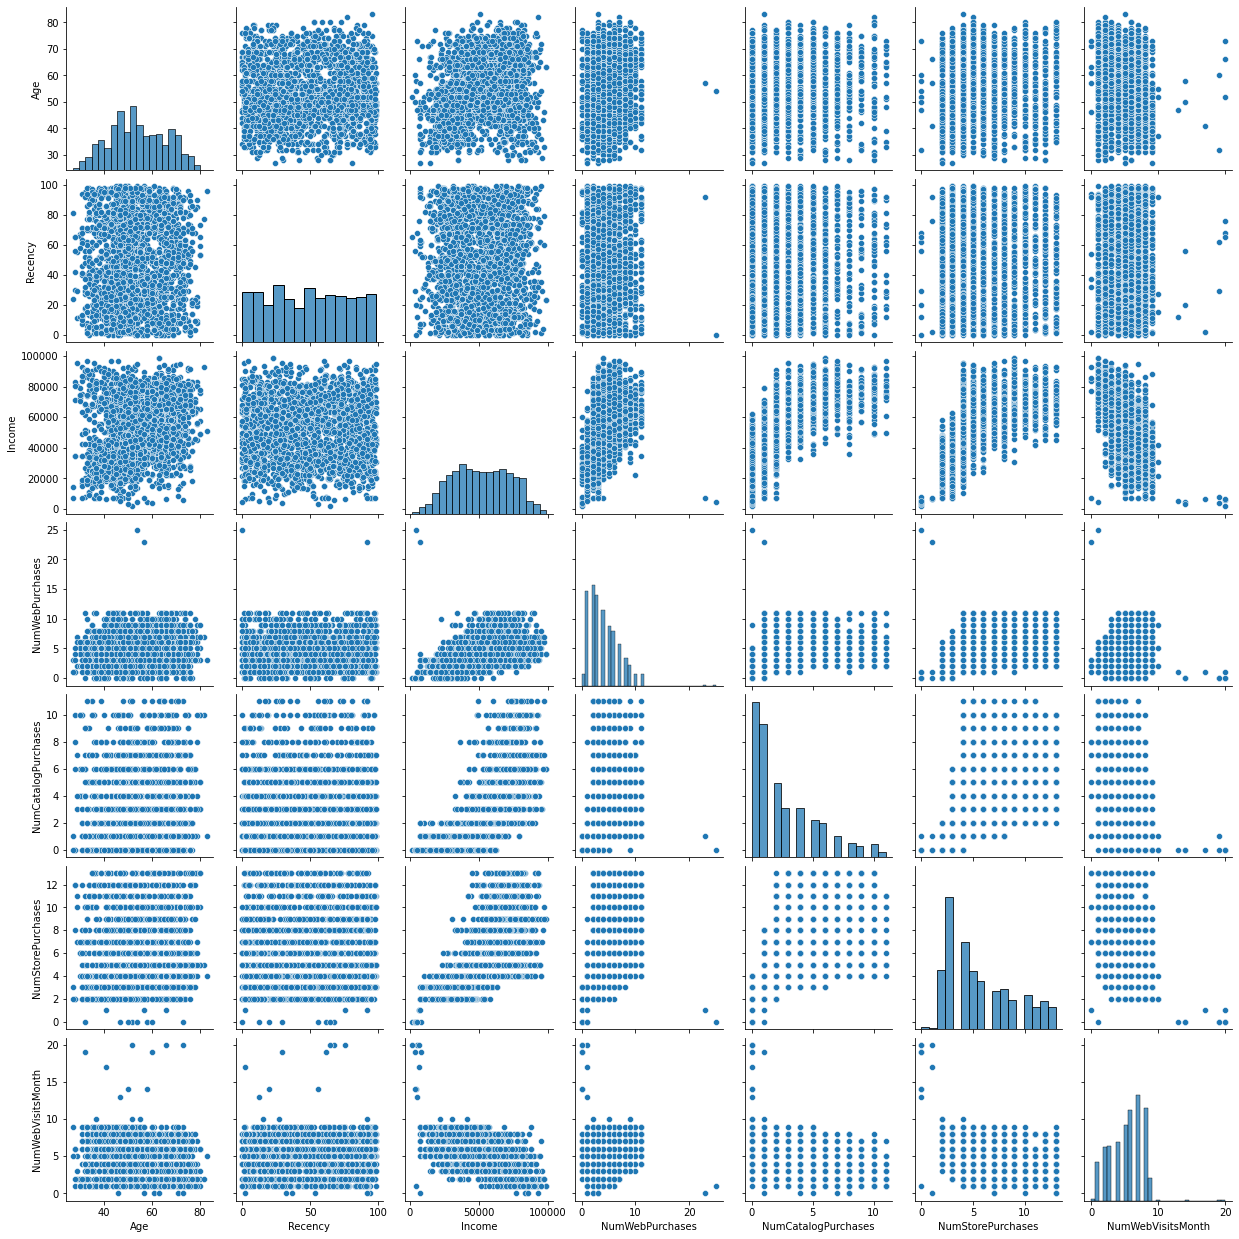

In [40]:
cols_to_use = list(set(list_people_cols) - {'ID', 'Year_Birth', 'Complain', 'Kidhome', 'Teenhome', 'Dt_Customer'})
cols_to_use += list_place_cols
df_peo_pla = df_clean[cols_to_use]
sns.pairplot(df_peo_pla, diag_kind="hist")

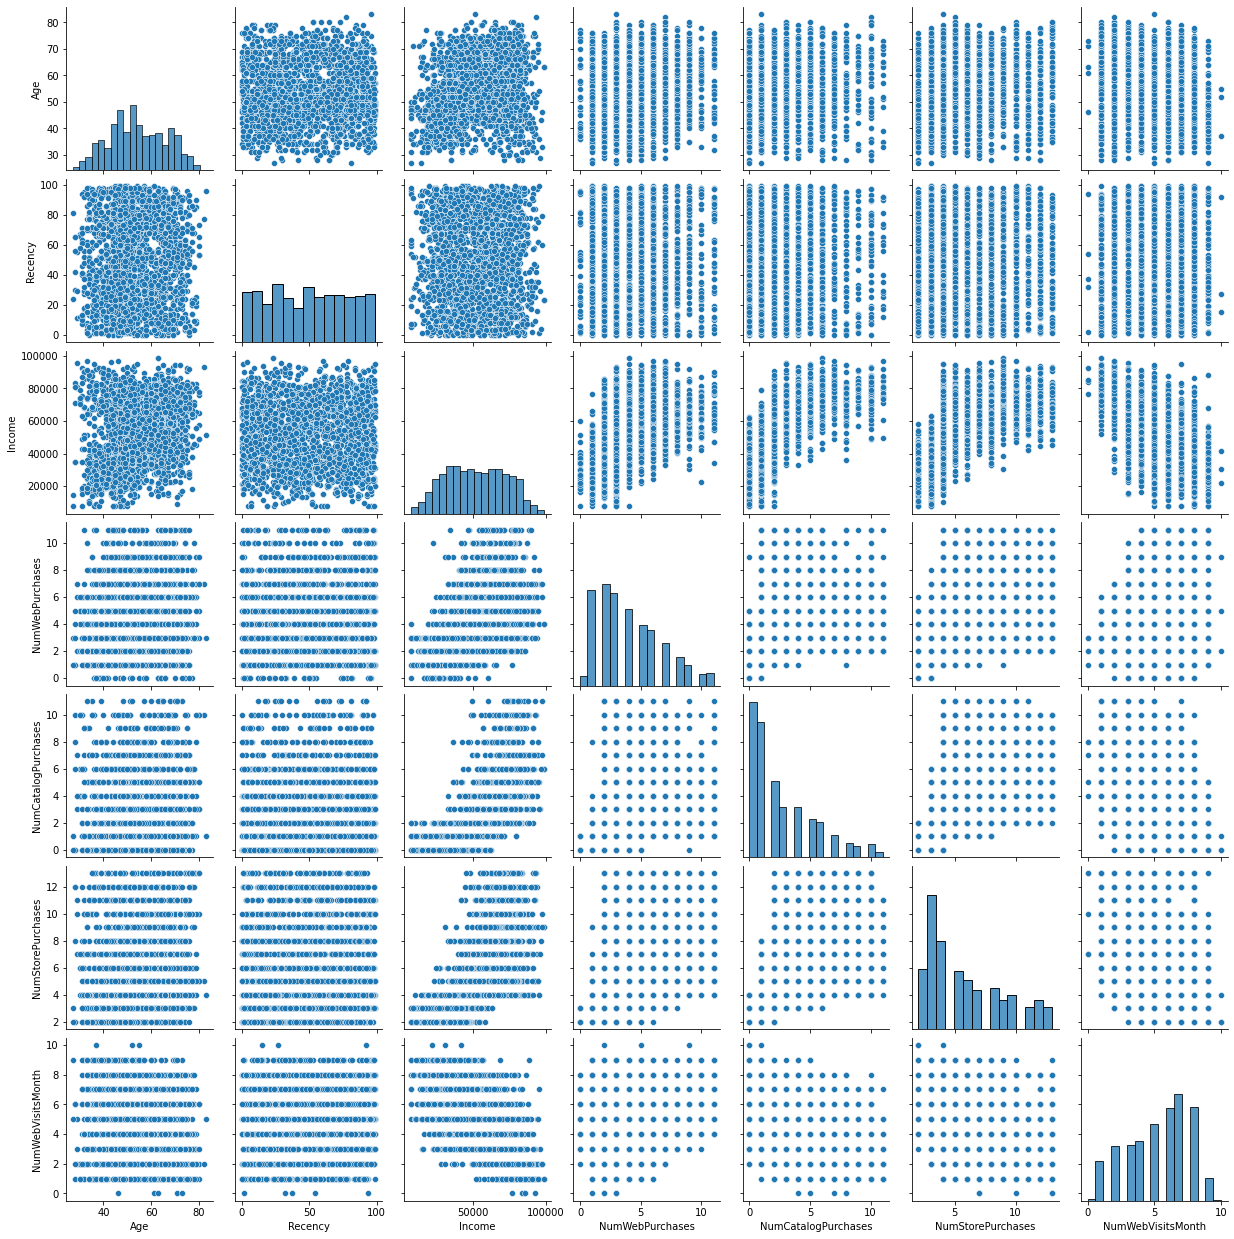

In [41]:
df_peo_pla_clean = df_peo_pla[df_peo_pla['NumWebPurchases'] < 20]
df_peo_pla_clean = df_peo_pla_clean[df_peo_pla_clean['NumWebVisitsMonth'] < 12]
sns.pairplot(df_peo_pla_clean, diag_kind="hist")

Again, with this Correlation what we can conclude is that bigger incomes means bigger purchases.

Income, Age and Recency doesnt inpact where the purchases are done. But, people that visit more the web page is buying a little more in the web that the persons that ocassionally visit the web. In other words, more web visits translate in more purchases

Another interesting thing is... that people with bigger income, visit less the web

C:\Users\mibolano\AppData\Local\Temp/ipykernel_24868/2449961293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_peo_pla_clean.corr()


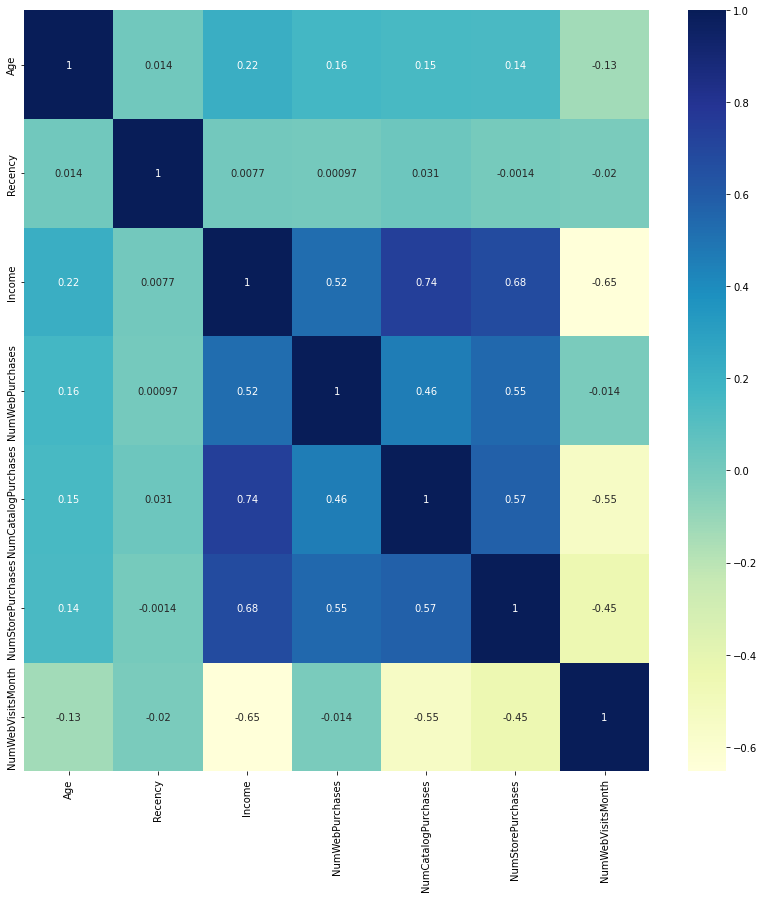

In [42]:
df_correlation = df_peo_pla_clean.corr()
fig = plt.figure(figsize = (14, 14))
sns.heatmap(df_correlation, cmap='YlGnBu', annot=True);